<b>Importing all the required modules</b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import string

In [2]:
df = pd.read_csv(r'C:\Users\RAHUL\Downloads\Capstone 2\SMSSpamCollection', sep='\t', names=['label', 'message'])

In [3]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<h2>Quantitative EDA</h2>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
label      5572 non-null object
message    5572 non-null object
dtypes: object(2)
memory usage: 87.1+ KB


In [5]:
df.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


We can see above that the most frequence label is ham and the most frequent message is Sorry, I'll call later.

<b> Inspecting the two unique values of label.</b>

In [6]:
df.groupby("label").describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

<b>Further inspection of message column</b>

In [7]:
df['message'].describe()

count                       5572
unique                      5169
top       Sorry, I'll call later
freq                          30
Name: message, dtype: object

We can see that the not all messages are different. Only 5169 messages are different and the rest are all same.

In [8]:
df['message'].apply(len).describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: message, dtype: float64

The average length of a message is 80 characters. The median length is 62 characters and the largest message is 910 characters long. The smallest message is just 2 characters long.

<b>Below are the smallest message by characters.</b>

In [9]:
df[df.message.apply(len)==2]

,label,message
1925,ham,Ok
3051,ham,Ok
4498,ham,Ok
5357,ham,Ok


In [10]:
df[df.message.apply(len)==2]['message'].value_counts()

Ok    4
Name: message, dtype: int64

<b>Now let's see the largest message by characters. </b>

In [11]:
df[df.message.apply(len)==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

<b>Checking the length of both ham and spam messages. </b>

In [12]:
spam = df[df.label=='spam']

In [13]:
spam['message'].apply(len).describe()

count    747.000000
mean     138.670683
std       28.873603
min       13.000000
25%      133.000000
50%      149.000000
75%      157.000000
max      223.000000
Name: message, dtype: float64

In [14]:
ham = df[df.label=='ham']

In [15]:
ham['message'].apply(len).describe()

count    4825.000000
mean       71.482487
std        58.440652
min         2.000000
25%        33.000000
50%        52.000000
75%        93.000000
max       910.000000
Name: message, dtype: float64

We can see that on an average the spam messages tend to be longer and they have a lower standard deviation.
Whereas, the ham messages are shorter and have a larger standard deviation.

<h2>Visual EDA</h2>

<b>Visually checking the difference between ham and spam.</b>

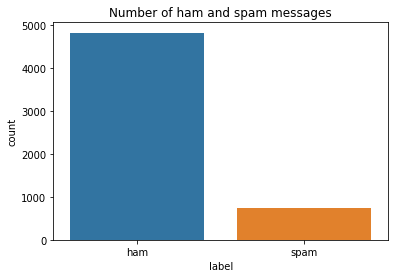

In [16]:
sns.countplot(df['label'])
plt.title('Number of ham and spam messages')
plt.show()

As we can see that most of the messages are ham.

In [17]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

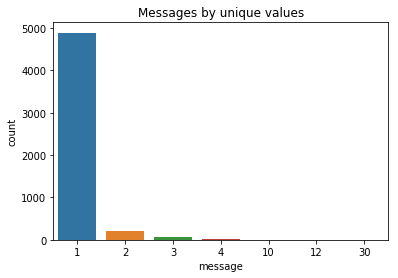

In [18]:
distinct = df['message'].value_counts()
sns.countplot(x=distinct, data=df)
plt.title('Messages by unique values')
plt.show()

Most messages are unique. Only 3 message values have been repeated 10, 12, and 30 times each.

In [19]:
spam_perc = (747/5572) * 100
print(spam_perc)

13.406317300789663


In [20]:
ham_perc = 100 - spam_perc

In [21]:
label = ['spam','ham']
size = [spam_perc,ham_perc]
explodes = (0.15, 0)

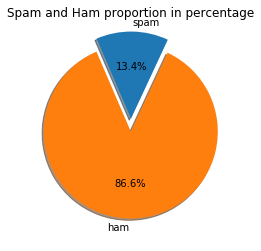

In [22]:
plt.pie(size, explode=explodes,labels=label,autopct='%1.1f%%',shadow=True,startangle=65)
plt.title('Spam and Ham proportion in percentage')
plt.show()

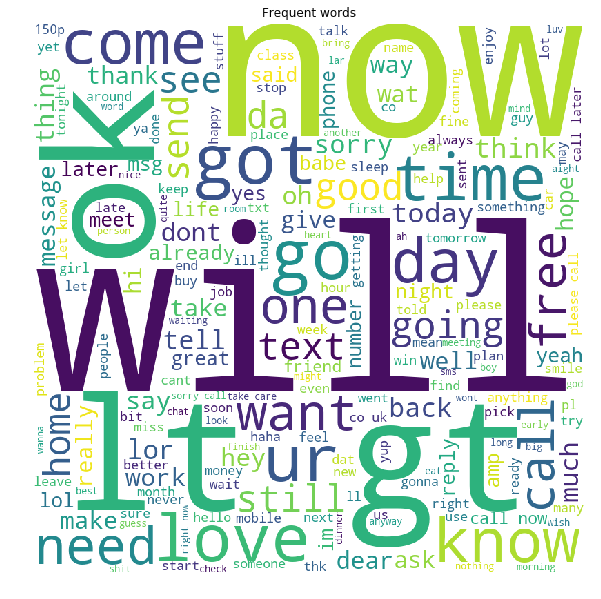

In [23]:
comment_words = ' '
stopwords = set(STOPWORDS) 

for val in df.message: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title('Frequent words')
  
plt.show() 

Above is the wod cloud of the whole dataset. Most repeated words are now, lt, gt, will.

In [24]:
spam_im = df.message[df.label=='spam']

In [25]:
spam_im.head()

2     Free entry in 2 a wkly comp to win FA Cup fina...
5     FreeMsg Hey there darling it's been 3 week's n...
8     WINNER!! As a valued network customer you have...
9     Had your mobile 11 months or more? U R entitle...
11    SIX chances to win CASH! From 100 to 20,000 po...
Name: message, dtype: object

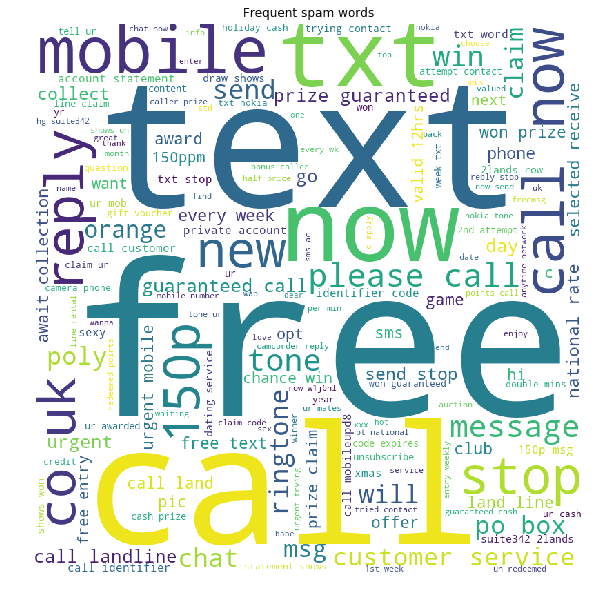

In [26]:
comment_words1 = ' '
stopwords = set(STOPWORDS) 

for val in spam_im: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words1 = comment_words1 + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words1) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.title('Frequent spam words')
  
plt.show() 

Above is the Word Cloud of Spam messages. Most common words are free, call and, text.

In [27]:
ham_im = df.message[df['label']=='ham']

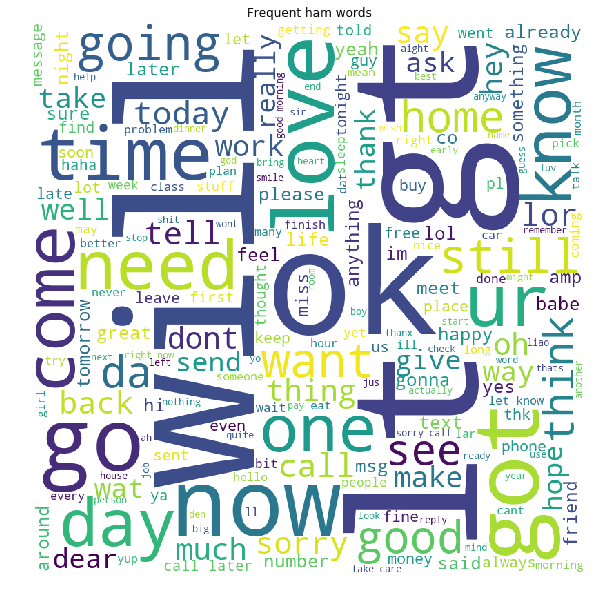

In [28]:
comment_words2 = ' '
stopwords = set(STOPWORDS) 

for val in ham_im: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words2 = comment_words2 + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words2) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title('Frequent ham words')
  
plt.show() 

Finally we have the word cloud of ham messages. Within the ham messages most common words are lt, gt, will, and ok.

In [29]:
spam_im.value_counts()

Please call our customer service representative on FREEPHONE 0808 145 4742 between 9am-11pm as you have WON a guaranteed £1000 cash or £5000 prize!                                  4
I don't know u and u don't know me. Send CHAT to 86688 now and let's find each other! Only 150p/Msg rcvd. HG/Suite342/2Lands/Row/W1J6HL LDN. 18 years or over.                       3
FREE for 1st week! No1 Nokia tone 4 ur mob every week just txt NOKIA to 8007 Get txting and tell ur mates www.getzed.co.uk POBox 36504 W45WQ norm150p/tone 16+                       3
HMV BONUS SPECIAL 500 pounds of genuine HMV vouchers to be won. Just answer 4 easy questions. Play Now! Send HMV to 86688 More info:www.100percent-real.com                          3
Loan for any purpose £500 - £75,000. Homeowners + Tenants welcome. Have you been previously refused? We can still help. Call Free 0800 1956669 or text back 'help'                   3
Camera - You are awarded a SiPix Digital Camera! call 09061221066 fromm landline. Del

In [30]:
ham_im.value_counts()

Sorry, I'll call later                                                                                                                                                                                                                                                                                                                                                                                                                                          30
I cant pick the phone right now. Pls send a message                                                                                                                                                                                                                                                                                                                                                                                                             12
Ok...                                                                                             

In [31]:
def remove_punct_and_stopw(sms):
    
    sms_no_punct = [ch for ch in sms if ch not in string.punctuation]
    sms_no_punct = "".join(sms_no_punct).split()
    
    sms_no_punct_stopw = \
        [word.lower() for word in sms_no_punct if word.lower() not in stopwords]
        
    return sms_no_punct_stopw

In [32]:
df_words= df.message.apply(remove_punct_and_stopw)

In [33]:
df_words.head()

0    [go, jurong, point, crazy, available, bugis, n...
1                       [ok, lar, joking, wif, u, oni]
2    [free, entry, 2, wkly, comp, win, fa, cup, fin...
3        [u, dun, say, early, hor, u, c, already, say]
4    [nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [34]:
list_words = []
for sublist in df_words:
    for item in sublist:
        list_words.append(item)

In [35]:
c_words  = Counter(list_words)
df_words_top  = pd.DataFrame(c_words.most_common(30),  columns=['word', 'count'])

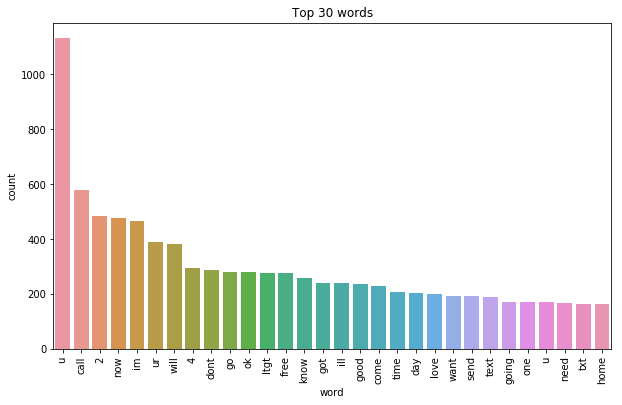

In [36]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='word', y='count', 
            data=df_words_top, ax=ax)
plt.title("Top 30 words")
plt.xticks(rotation='vertical');

The most frequently used word is u.

In [37]:
ham_im.head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
6    Even my brother is not like to speak with me. ...
Name: message, dtype: object

In [38]:
df_ham_words= ham_im.apply(remove_punct_and_stopw)

In [39]:
type(df_ham_words)

pandas.core.series.Series

In [40]:
list_ham_words = []
for sublist in df_ham_words:
    for item in sublist:
        list_ham_words.append(item)

In [41]:
c_ham_words  = Counter(list_ham_words)
df_ham_words  = pd.DataFrame(c_ham_words.most_common(30),  columns=['word', 'count'])

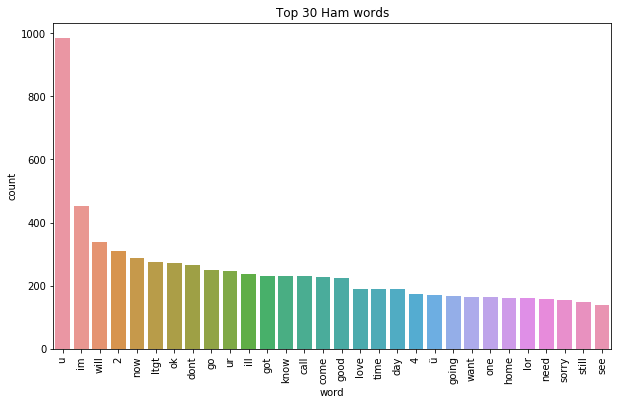

In [42]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='word', y='count', 
            data=df_ham_words, ax=ax)
plt.title("Top 30 Ham words")
plt.xticks(rotation='vertical');

The most frequently used word in ham messages is u.

In [43]:
df_spam_words= spam_im.apply(remove_punct_and_stopw)

In [44]:
list_spam_words = []
for sublist in df_spam_words:
    for item in sublist:
        list_spam_words.append(item)

In [45]:
c_spam_words  = Counter(list_spam_words)
df_spam_words  = pd.DataFrame(c_spam_words.most_common(30),  columns=['word', 'count'])

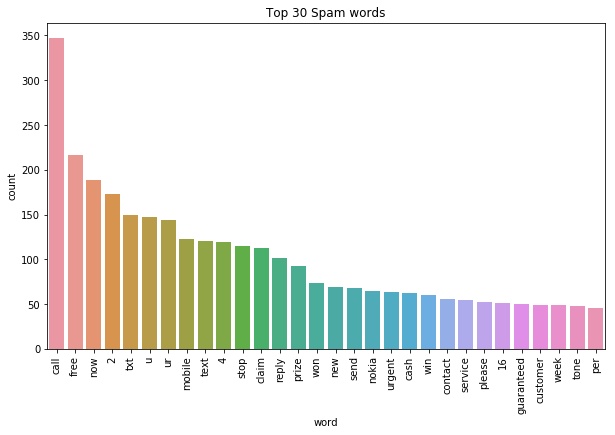

In [46]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='word', y='count', 
            data=df_spam_words, ax=ax)
plt.title("Top 30 Spam words")
plt.xticks(rotation='vertical');

The most frequently used word in spam messages is call.